In [194]:
#importation des libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

#importation des biblioteques
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVR, SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import f1_score, recall_score, confusion_matrix, accuracy_score, classification_report, r2_score

In [195]:
#Importation des datasets
df = pd.read_csv("Australian_Student_PerformanceData (ASPD24).csv")
df.head()

,Student ID,University ID,University Name,Age,Gender,Major,Year of Study,GPA,High School GPA,Entrance Exam Score,...,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Learning Style,Study Environment,Core Course Average,Extracurricular Participation,Peer Evaluations,Performance
0,1,86,University C,25,F,EE,1,2.06,3.50,60,...,0,0,61,5,Visual,Good,51,0,83,Satisfactory
1,2,17,University A,26,F,ME,4,2.12,3.46,52,...,0,1,72,7,Reading/Writing,Excellent,60,0,56,Poor
2,3,52,University C,20,M,CS,4,2.72,3.33,94,...,0,0,79,2,Auditory,Excellent,65,0,52,Satisfactory
3,4,91,University A,25,M,ME,1,3.05,3.54,65,...,1,0,50,7,Kinesthetic,Excellent,58,1,65,Needs Improvement
4,5,33,University C,22,F,CE,3,1.86,3.35,51,...,1,1,68,4,Visual,Poor,62,0,71,Good


In [196]:
df.columns

Index(['Student ID', 'University ID', 'University Name', 'Age', 'Gender',
       'Major', 'Year of Study', 'GPA', 'High School GPA',
       'Entrance Exam Score', 'Attendance Rate',
       'Participation in Extracurricular Activities', 'Part-time Job',
       'Hours of Study per Week', 'Family Income', 'Parental Education Level',
       'Accommodation Type', 'Distance from Home to University',
       'Internet Access at Home', 'Library Usage',
       'Access to Academic Resources', 'Health Condition',
       'Mental Health Status', 'Scholarship', 'Financial Aid', 'Tutor Support',
       'Counseling Services', 'Transportation Mode',
       'Hours of Sleep per Night', 'Diet Quality', 'Exercise Frequency',
       'Social Integration', 'Peer Support', 'Language Proficiency',
       'Use of Online Learning Platforms', 'Class Participation',
       'Project/Assignment Scores', 'Midterm Exam Scores', 'Final Exam Scores',
       'Attendance at Office Hours', 'Group Work Participation',
       

Il y a 100256 lignes des données et 51 variables 

In [197]:
df.shape

(100256, 51)

Il y a 19966 des valeurs NAN dans la variables "Parental Education Level"

In [198]:
df.isna().sum()

Student ID                                         0
University ID                                      0
University Name                                    0
Age                                                0
Gender                                             0
Major                                              0
Year of Study                                      0
GPA                                                0
High School GPA                                    0
Entrance Exam Score                                0
Attendance Rate                                    0
Participation in Extracurricular Activities        0
Part-time Job                                      0
Hours of Study per Week                            0
Family Income                                      0
Parental Education Level                       19966
Accommodation Type                                 0
Distance from Home to University                   0
Internet Access at Home                       

Il n'y pas des variables dupliqué dans le données

In [199]:
df.duplicated().sum()

0

In [200]:
data_resum = df.describe()
data_resum

,Student ID,University ID,Age,Year of Study,GPA,High School GPA,Entrance Exam Score,Attendance Rate,Participation in Extracurricular Activities,Part-time Job,...,Final Exam Scores,Attendance at Office Hours,Group Work Participation,Research Involvement,Internship Experience,Peer Reviews,Academic Advising,Core Course Average,Extracurricular Participation,Peer Evaluations
count,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,...,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000,100256.000000
mean,50128.500000,50.445579,23.502504,2.503960,2.497590,2.995729,74.429052,0.749768,0.501097,0.500559,...,74.562580,4.496170,0.500798,0.499551,0.499781,74.470735,4.494664,74.483492,0.500399,74.550411
std,28941.558631,28.908475,3.449642,1.118541,0.864179,0.578641,14.408504,0.144357,0.500001,0.500002,...,14.447233,2.882907,0.500002,0.500002,0.500002,14.402783,2.872367,14.396146,0.500002,14.445583
min,1.000000,1.000000,18.000000,1.000000,1.000000,2.000000,50.000000,0.500000,0.000000,0.000000,...,50.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,50.000000,0.000000,50.000000
25%,25064.750000,25.000000,21.000000,2.000000,1.750000,2.490000,62.000000,0.620000,0.000000,0.000000,...,62.000000,2.000000,0.000000,0.000000,0.000000,62.000000,2.000000,62.000000,0.000000,62.000000
50%,50128.500000,50.000000,24.000000,3.000000,2.500000,2.990000,74.000000,0.750000,1.000000,1.000000,...,75.000000,4.000000,1.000000,0.000000,0.000000,74.000000,4.000000,74.000000,1.000000,75.000000
75%,75192.250000,76.000000,27.000000,4.000000,3.240000,3.500000,87.000000,0.870000,1.000000,1.000000,...,87.000000,7.000000,1.000000,1.000000,1.000000,87.000000,7.000000,87.000000,1.000000,87.000000
max,100256.000000,100.000000,29.000000,4.000000,4.000000,4.000000,99.000000,1.000000,1.000000,1.000000,...,99.000000,9.000000,1.000000,1.000000,1.000000,99.000000,9.000000,99.000000,1.000000,99.000000


In [201]:
data_resum.shape

(8, 36)

In [202]:
data_gpa = df[["GPA", "Final Exam Scores", "Hours of Study per Week", "Attendance Rate","Mental Health Status", "Participation in Extracurricular Activities", "Family Income", "Performance"]]
data_hsgpa = df[["High School GPA", "Final Exam Scores", "Hours of Study per Week", "Attendance Rate","Mental Health Status", "Participation in Extracurricular Activities", "Family Income", "Performance"]]

In [203]:
print(data_gpa.columns)
print(data_hsgpa.columns)

Index(['GPA', 'Final Exam Scores', 'Hours of Study per Week',
       'Attendance Rate', 'Mental Health Status',
       'Participation in Extracurricular Activities', 'Family Income',
       'Performance'],
      dtype='object')
Index(['High School GPA', 'Final Exam Scores', 'Hours of Study per Week',
       'Attendance Rate', 'Mental Health Status',
       'Participation in Extracurricular Activities', 'Family Income',
       'Performance'],
      dtype='object')


Tranformation des données pour les changements d'universités

In [204]:
def eval_performance(gpa):
    if gpa < 2.0:
        return "Poor"
    elif gpa < 2.5:
        return "Needs Improvement"
    elif gpa < 3.0:
        return "Satisfactory"
    elif gpa < 3.5:
        return "Good"
    else:
        return "Excellent"

In [205]:
data_gpa["Performance"] = data_gpa["GPA"].apply(eval_performance)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7176\278985536.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_gpa["Performance"] = data_gpa["GPA"].apply(eval_performance)


In [206]:
data_gpa.head()

,GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income,Performance
0,2.06,81,17,0.84,Fair,0,145601,Needs Improvement
1,2.12,79,21,0.73,Excellent,1,53989,Needs Improvement
2,2.72,53,34,0.96,Poor,0,109617,Satisfactory
3,3.05,81,21,0.84,Fair,1,152274,Good
4,1.86,93,37,0.92,Fair,1,86133,Poor


In [207]:
data_hsgpa["Performance"] = data_hsgpa["High School GPA"].apply(eval_performance)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_7176\1036915948.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_hsgpa["Performance"] = data_hsgpa["High School GPA"].apply(eval_performance)


In [208]:
data_hsgpa.head()

,High School GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income,Performance
0,3.50,81,17,0.84,Fair,0,145601,Excellent
1,3.46,79,21,0.73,Excellent,1,53989,Good
2,3.33,53,34,0.96,Poor,0,109617,Good
3,3.54,81,21,0.84,Fair,1,152274,Excellent
4,3.35,93,37,0.92,Fair,1,86133,Good


In [209]:
performance_map = {
    'Poor': 1,
    'Needs Improvement': 2,
    'Satisfactory': 3,
    'Good': 4,
    'Excellent': 5
}

In [210]:
data_HSGPA = data_hsgpa.copy()
data_HSGPA["Performance"] = data_HSGPA["Performance"].map(performance_map)
data_HSGPA.head()

,High School GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income,Performance
0,3.50,81,17,0.84,Fair,0,145601,5
1,3.46,79,21,0.73,Excellent,1,53989,4
2,3.33,53,34,0.96,Poor,0,109617,4
3,3.54,81,21,0.84,Fair,1,152274,5
4,3.35,93,37,0.92,Fair,1,86133,4


In [211]:
data_HSGPA.shape

(100256, 8)

In [212]:
data_GPA = data_gpa.copy()
data_GPA["Performance"] = data_GPA["Performance"].map(performance_map)
data_GPA.head()

,GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income,Performance
0,2.06,81,17,0.84,Fair,0,145601,2
1,2.12,79,21,0.73,Excellent,1,53989,2
2,2.72,53,34,0.96,Poor,0,109617,3
3,3.05,81,21,0.84,Fair,1,152274,4
4,1.86,93,37,0.92,Fair,1,86133,1


Correlation de performance et GPA

In [213]:
o = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
data_GPA_c = data_GPA.copy()
# data_GPA_c["Performance"] = data_GPA_c["Performance"].map(performance_map)
data_GPA_c["Performance"] = o.fit_transform(data_GPA_c[["Performance"]])

<Axes: >

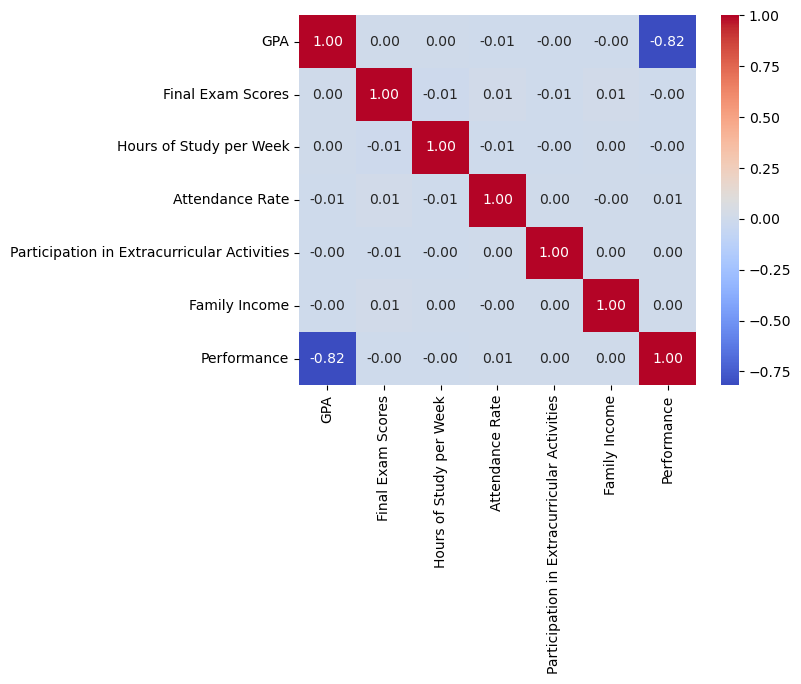

In [214]:
cor = data_GPA_c.select_dtypes(exclude="object").corr()
sns.heatmap(cor, annot=True, cmap="coolwarm", fmt=".2f")

In [215]:
data_GPA.shape

(100256, 8)

In [216]:
X_gpa = data_GPA[["GPA", "Final Exam Scores", "Hours of Study per Week", "Attendance Rate","Mental Health Status", "Participation in Extracurricular Activities", "Family Income"]]
y_gpa = data_GPA["Performance"]
X_hsgpa = data_HSGPA[["High School GPA", "Final Exam Scores", "Hours of Study per Week", "Attendance Rate","Mental Health Status", "Participation in Extracurricular Activities", "Family Income"]]
y_hsgpa = data_HSGPA["Performance"]

In [217]:
X_gpa.head()

,GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income
0,2.06,81,17,0.84,Fair,0,145601
1,2.12,79,21,0.73,Excellent,1,53989
2,2.72,53,34,0.96,Poor,0,109617
3,3.05,81,21,0.84,Fair,1,152274
4,1.86,93,37,0.92,Fair,1,86133


In [218]:
X_hsgpa.head()

,High School GPA,Final Exam Scores,Hours of Study per Week,Attendance Rate,Mental Health Status,Participation in Extracurricular Activities,Family Income
0,3.50,81,17,0.84,Fair,0,145601
1,3.46,79,21,0.73,Excellent,1,53989
2,3.33,53,34,0.96,Poor,0,109617
3,3.54,81,21,0.84,Fair,1,152274
4,3.35,93,37,0.92,Fair,1,86133


Preprocessing

In [219]:
obj = make_column_selector(dtype_include=["object"])
num = make_column_selector(dtype_exclude=["object"])
print(obj)
print(num)

In [220]:
preprocessor_gpa = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), obj),
    (StandardScaler(), num),
    remainder="passthrough"
)
preprocessor_hsgpa = make_column_transformer(
    (OneHotEncoder(handle_unknown="ignore"), obj),
    (StandardScaler(), num),
    remainder="passthrough"
)

Modeles pour GPA et HSGPA

In [221]:
model_gpa = make_pipeline(
    preprocessor_gpa,
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
)

model_hsgpa = make_pipeline(
    preprocessor_hsgpa,
    RandomForestClassifier(n_estimators=100, random_state=42, class_weight="balanced")
)

Separation des donnnées

In [222]:
X_train_gpa, X_test_gpa, y_train_gpa, y_test_gpa = train_test_split(X_gpa, y_gpa, test_size=0.25, random_state=42, stratify=y_gpa,shuffle=True)
X_train_hsgpa, X_test_hsgpa, y_train_hsgpa, y_test_hsgpa = train_test_split(X_hsgpa, y_hsgpa, test_size=0.25, random_state=42, stratify=y_hsgpa, shuffle=True)

In [223]:
print(X_train_gpa.shape, X_test_gpa.shape)
print(X_train_hsgpa.shape, X_test_hsgpa.shape)
print(y_train_gpa.shape, y_test_gpa.shape)
print(y_train_hsgpa.shape, y_test_hsgpa.shape)

(75192, 7) (25064, 7)
(75192, 7) (25064, 7)
(75192,) (25064,)
(75192,) (25064,)


Entrainement du modèle pour GPA et HSGPA

In [224]:
model_gpa.fit(X_train_gpa, y_train_gpa)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016C5979C6D0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016C596F67D0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [225]:
model_gpa.score(X_test_gpa, y_test_gpa)

1.0

In [226]:
model_hsgpa.fit(X_train_hsgpa, y_train_hsgpa)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016C5979C6D0>),
                                                 ('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x0000016C596F67D0>)])),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight='balanced',
                                        random_state=42))])

In [227]:
model_hsgpa.score(X_test_hsgpa, y_test_hsgpa)

1.0

In [228]:
y_pred_gpa = model_gpa.predict(X_test_gpa)
y_pred_hsgpa = model_hsgpa.predict(X_test_hsgpa)

Evaluation des performances

In [229]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score


GPA metrics

In [230]:
print("Accuracy:", accuracy_score(y_test_gpa, y_pred_gpa))
print("Precision:", precision_score(y_test_gpa, y_pred_gpa, average='weighted'))
print("Recall:", recall_score(y_test_gpa, y_pred_gpa, average='weighted'))
print("F1 Score:", f1_score(y_test_gpa, y_pred_gpa, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_gpa, y_pred_gpa))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[8311    0    0    0    0]
 [   0 4151    0    0    0]
 [   0    0 4245    0    0]
 [   0    0    0 4224    0]
 [   0    0    0    0 4133]]


HSGPA metrics

In [231]:
print("Accuracy:", accuracy_score(y_test_hsgpa, y_pred_hsgpa))
print("Precision:", precision_score(y_test_hsgpa, y_pred_hsgpa, average='weighted'))
print("Recall:", recall_score(y_test_hsgpa, y_pred_hsgpa, average='weighted'))
print("F1 Score:", f1_score(y_test_hsgpa, y_pred_hsgpa, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test_hsgpa, y_pred_hsgpa))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
 [[6287    0    0    0]
 [   0 6288    0    0]
 [   0    0 6199    0]
 [   0    0    0 6290]]


Verification s'il y pas des overfit ou underfit

In [233]:

from sklearn.model_selection import cross_val_score

scores = cross_val_score(model_gpa, X_train_gpa, y_train_gpa, cv=5, scoring='accuracy')

print("Scores de validation croisée :", scores)
print("Moyenne CV :", scores.mean())

Scores de validation croisée : [1. 1. 1. 1. 1.]
Moyenne CV : 1.0


Enregistrement du modèle

In [236]:
import joblib

# Sauvegarde
joblib.dump(model_gpa, "models/model_gpa.pkl")
joblib.dump(model_hsgpa, "models/model_hsgpa.pkl")

['models/model_hsgpa.pkl']